In [ ]:
# Importar librerias
import numpy as np
import pandas as pd
# Genera el reporte estadistico
from pandas_profiling import ProfileReport

In [ ]:
# Se sube los datos aun Dataframe de Pandas
data = pd.read_csv("scopus.csv")

In [ ]:
#Se llama al objeto ProfileReport y se le pasa la data cargada y un titulo
profile = ProfileReport(data, title="Profiling Report")

In [ ]:
# Se muestra en pantalla el reporte
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:

import requests
from bs4 import BeautifulSoup

# Abrir, manipular y guardar imagenes
from PIL import Image
#Generar nubes de palabras a partir de texto
from wordcloud import WordCloud, ImageColorGenerator
#Para graficar
import matplotlib.pyplot as plt
#Operaciones con cadenas
import string
#Para trabajar con datos de lenguaje natural
import nltk
#genera la lista de palabras mas comunes
from nltk.corpus import stopwords

In [ ]:
#Descarga las palabras vacias del paquete nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Creamos una lista vacía llamada "punctuation"
punctuation=[]

# iteramos a través de todos los caracteres de puntuación 
for s in string.punctuation:
    
    # Agregamos los caracteres de puntuacion a la lista
    punctuation.append(str(s))
    
# Creamos otra lista lque contiene algunos caracteres de puntuación adicionales
sp_punctuation = ["¿", "¡", "“", "”", "…", ":", "–", "»", "«"]    

# Agregamos la lista anterior a la lista "punctuation" 
punctuation += sp_punctuation

In [23]:
#Generamos un variable y establecemos que es str
titulos = str
#Iteramos sobre los datos en la columna abstract del dataframe
for titulo in data["Abstract"]:
    # Se concantenan los titulos
    titulos = titulo + " " + str(titulos)
titulos

'The Internet of Things (IoT) is growing rapidly in today’s world. A big challenge nowadays is the large volume of data generated between WSN and the cloud infrastructure. Fog computing is a new technology that is an extension to the cloud where processing is performed at the edge of the network, reducing latency and traffic as well. Because of its structure, it has a high demand in healthcare applications, smart homes, supply chain management, smart cities, and intelligent transportation system. Nano data centers (nDCs) are called the tiny computers at the edge of the network. Load balancing is achieved by the current fog architecture. User request allocation technique plays a vital role in fog server energy consumption. The allocation of the user request task to fog servers in a fog environment is a difficult (NP-hard) problem. This article proposes a task consolidation for energy saving by reducing the unused nDCs in a fog computing environment and maximizing CPU utilization. © The 

In [ ]:
# Se seleccinan las stopwords del idioma ingles
stop_words = stopwords.words('english')

In [ ]:
# Se limpia el texto de los titulos, donde se eliminan todos los signos de puntuacion
for p in punctuation:
    clean_texto = titulos.lower().replace(p,"")


In [24]:
# Se itera cada stop word
for stop in stop_words:
    # Tranformamos el clean_texto en una lista de palabras
    clean_texto_list = clean_texto.split()
    # Se elimina cualquier espacio en blanco 
    clean_texto_list = [i.strip() for i in clean_texto_list]
    #Intentamos remover las ocurrencias de las stop words
    try:
        while stop in clean_texto_list: clean_texto_list.remove(stop)
    except:
        print("Error")
        pass
    # Convertimos la lista de palabras en una cadena de texto
    clean_texto= " ".join(clean_texto_list)

In [ ]:
#Convertimos la cadena de texto en una lista de palabras
lista_texto = clean_texto.split(" ")

palabras = []
# Se itera la lista de palabras
for palabra in lista_texto:
  #Confirmamos si la longitud de la palabra esta entre 3 y 18
    if (len(palabra)>=3 and len(palabra)<18):
      # Agregamos la palabra al la lista palabras
        palabras.append(palabra)

In [ ]:
# Generamos un diccionario
word_count={}
#iteramos la lista de palabras
for palabra in palabras:
    # Confirmamos si palabra esta en la llave del diccionario
    if palabra in word_count.keys():
    # Si esta se le suma uno
        word_count[palabra][0]+=1
    else:
      # Si no esta, se crea la llave y el valor 1
        word_count[palabra]=[1]
 

In [ ]:
# Generamos un datagrame del diccionario word_count transpuesto
df = pd.DataFrame.from_dict(word_count).transpose()
# Nombramos a las columnas
df.columns=["freq"]
# Ordenamos por el valor de freq
df.sort_values(["freq"], ascending=False, inplace=True)
df.head(10)

freq
smart       3248
home        2252
health      2079
system      1969
data        1963
iot         1624
care        1441
using       1418
monitoring  1135
patients    1131

In [ ]:
# Se genera un metodo que grafica un grafica de barras, donde recibe una data y un valor top
def plot_bar(data=df, top=5):    
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(x =df.iloc[:top,:].index, height = df.iloc[:top,0].values)
    plt.show()

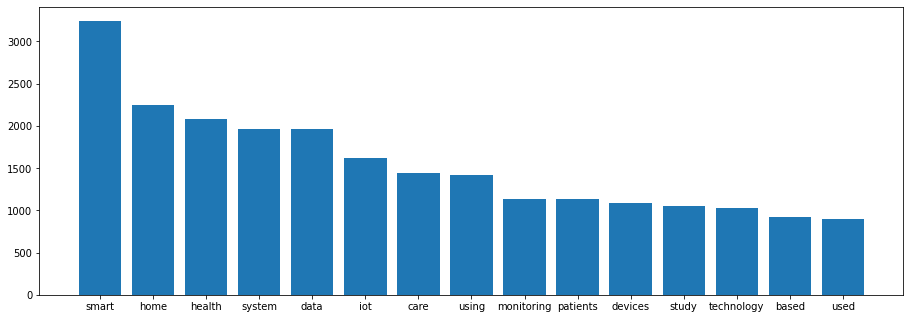

In [ ]:
# Se llama al metodo, pasandole al data, y el top 15 de frecuencia
plot_bar(data=df, top=15)

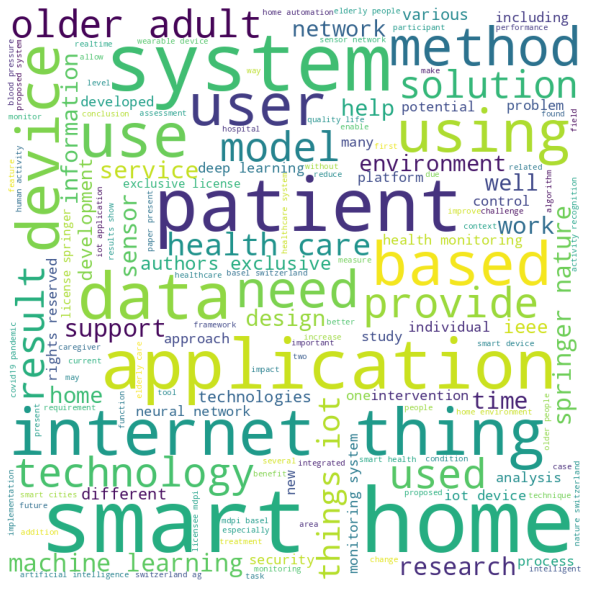

In [ ]:
#Se genera los parametros para crear la nube de palabras
word_cloud = WordCloud(height=800, width=800, background_color='white',max_words=150, min_font_size=5, collocation_threshold=10).generate(clean_texto)
word_cloud.to_file("n1.png") 
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Se muestra el dataFrame data
data.head()

Authors  \
0                                                NaN   
1  Sorwar G.; Aggar C.; Penman O.; Seton C.; Ward A.   
2  Kumpik D.P.; Santos-Rodriguez R.; Selwood J.; ...   
3  Ramanathan U.; Pelc K.; Costa T.P.D.; Ramanath...   
4  Hayashi V.T.; Ruggiero W.V.; Estrella J.C.; Fi...   

                                   Author full names  \
0                                                NaN   
1  Sorwar, Golam (55941054300); Aggar, Christina ...   
2  Kumpik, Daniel Paul (26434363200); Santos-Rodr...   
3  Ramanathan, Usha (35222184300); Pelc, Katarzyn...   
4  Hayashi, Victor Takashi (57218551681); Ruggier...   

                                        Author(s) ID  \
0                                                NaN   
1  55941054300; 25633909900; 57225071643; 5718853...   
2  26434363200; 27968154800; 57205408054; 5554260...   
3  35222184300; 57971513800; 58055713800; 5805549...   
4  57218551681; 6507255889; 15059935900; 57350705...   

                                              Titles  Year  \
0  3rd International Conference on Data Science, ...  2023   
1  Factors that predict the acceptance and adopti...  2023   
2  A longitudinal observational study of home-bas...  2022   
3  A Case Study of Human Milk Banking with Focus ...  2023   
4  A TDD Framework for Automated Monitoring in In...  2022   

                              Source title Volume Issue Art. No. Page start  \
0  Lecture Notes in Electrical Engineering    947   NaN      NaN        NaN   
1   Informatics for Health and Social Care     48     1      NaN         80   
2                                 BMJ Open     12    11  e065033        NaN   
3             Sustainability (Switzerland)     15     1      243        NaN   
4                                  Sensors     22    23     9498        NaN   

   ... Cited by                                               Link  \
0  ...        0  https://www.scopus.com/inward/record.uri?eid=2...   
1  ...        1  https://www.scopus.com/inward/record.uri?eid=2...   
2  ...        0  https://www.scopus.com/inward/record.uri?eid=2...   
3  ...        2  https://www.scopus.com/inward/record.uri?eid=2...   
4  ...        1  https://www.scopus.com/inward/record.uri?eid=2...   

                                            Abstract  \
0  The proceedings contain 85 papers. The special...   
1  Smart Home Technology presents an exciting opp...   
2  Introduction Limitations in effective dementia...   
3  Human milk is the biological norm for newborn ...   
4  Robust, fault tolerant, and available systems ...   

                                    Indexed Keywords  \
0                                                NaN   
1  Aged; Australia; Humans; Longitudinal Studies;...   
2  Biomarkers; Cognitive Dysfunction; Dementia; F...   
3  algorithm; blood; GPS; milk; relative humidity...   
4  Algorithms; Internet; Internet of Things; Mach...   

                                     Author Keywords      Document Type  \
0                                                NaN  Conference review   
1  acceptance and adoption models; australian; se...            Article   
2  Adult neurology; Dementia; GERIATRIC MEDICINE;...            Article   
3  human milk bank; IoT technologies; temperature...            Article   
4  IoT; machine learning; software engineering; T...            Article   

  Publication Stage                                        Open Access  \
0             Final                                                NaN   
1             Final                                                NaN   
2             Final  All Open Access; Gold Open Access; Green Open ...   
3             Final  All Open Access; Gold Open Access; Green Open ...   
4             Final  All Open Access; Gold Open Access; Green Open ...   

   Source                 EID  
0  Scopus  2-s2.0-85149973181  
1  Scopus  2-s2.0-85130010999  
2  Scopus  2-s2.0-85142939066  
3  Scopus  2-s2.0-85146046545  
4  Scopus  2-s2.0-85143755750  

[5